# Plotting ANN sampling data for alanine tripeptide

Here we plot the free energy landscapes for alanine tripeptide obtained using ANN sampling on all 4 backbone dihedral angles. This is a demonstration of the application of ANN sampling to high-dimensional systems.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "serif"
%matplotlib inline

## Evolution of the collective variables

Let's plot all four collective variables and identify when the bias has sufficiently built up, allowing for "free diffusion" across free energy barriers.

In [2]:
X = np.loadtxt("cvs.dat", skiprows=1)
X[:,0] *= 0.002/1000. # Convert to nanoseconds.

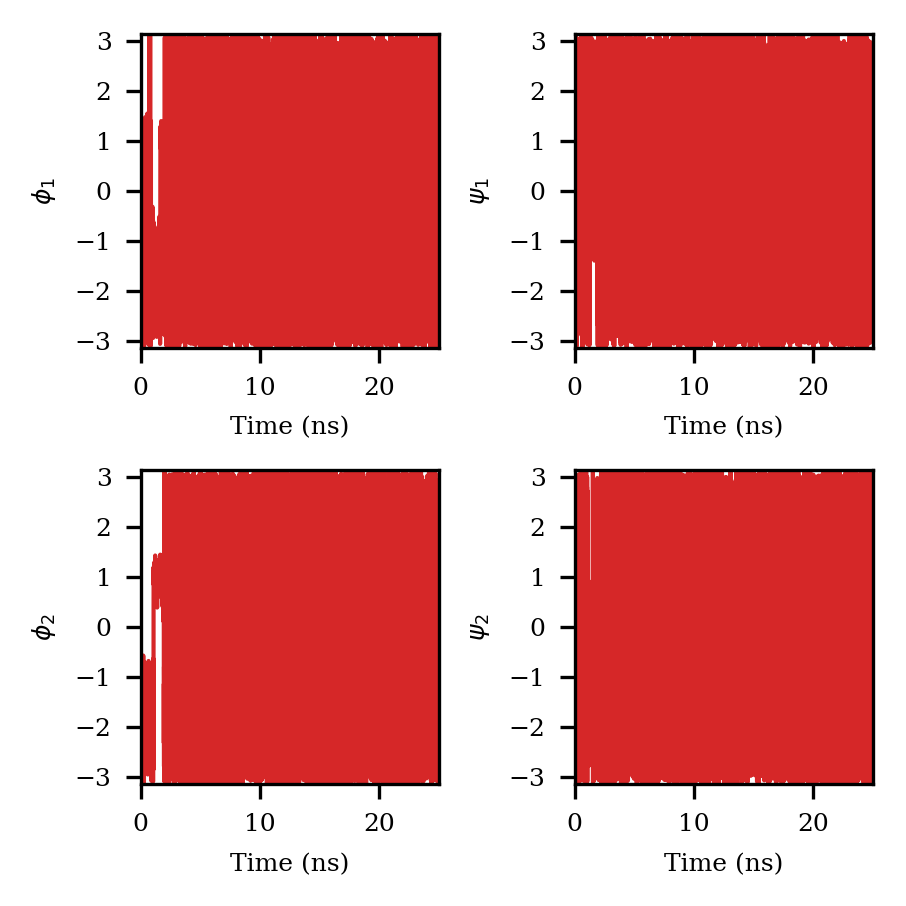

In [3]:
rcParams.update({'font.size': 6})
fig = plt.figure(figsize=(3, 3), dpi=300)
torsions = [r"$\phi_1$", r"$\psi_1$", r"$\phi_2$", r"$\psi_2$"]

for i in range(1, 5):
    fig.add_subplot(2, 2, i)
    plt.plot(X[:,0], X[:,i], "C3", linewidth=1.)
    plt.xlim([0, 25])
    plt.xlabel("Time (ns)")
    plt.ylabel(torsions[i-1])
    plt.ylim([-np.pi, np.pi])
    plt.yticks(range(-3, 4, 1))

plt.tight_layout()
plt.savefig("tripep_cvs.png")
plt.savefig("tripep_cvs.eps")

## Time evolution of free energy estimate
Here we will plot the two Ramachandran plots ($\psi_1$ vs $\phi_1$ and $\psi_2$ vs $\phi_2$) over time by integrating out the appropriate dimensions and observe the evolution of the bias.

In [4]:
# Simple function for integration fo dimensions. Note that dims must be relative to the integrated FEL.
def integrate_dims(xg, fg, dims):
    ff = fg.copy()
    for d in dims:
        ff = np.trapz(ff, xg[d], axis=d)/np.diff(xg[d][[0,-1]])
    return ff

In [5]:
dt = 0.002 # Timestep in fs. 
times = np.array([1000, 2500, 5000, 10000, 20000, 60000]) # Times at which to plot FES (ps).
v = np.arange(-100, 5, 5) # Contours to plot.
sweep = 10000 # Sweep interval (in steps)

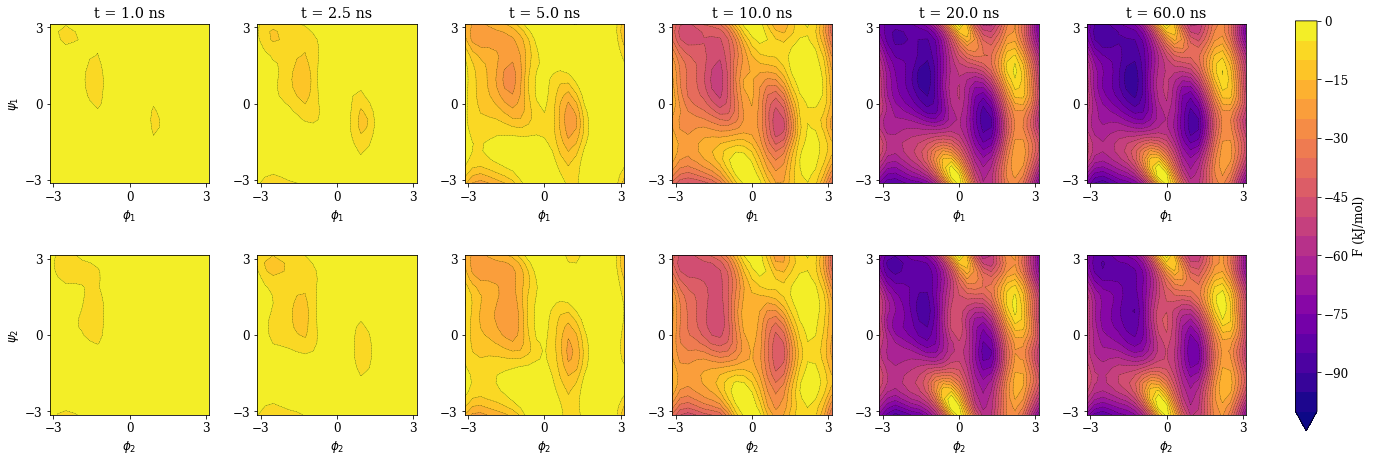

In [6]:
rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(20, 7.3))
i = 1
for t in times:
    frame = int(t/(sweep*dt))
    
    # Load data.
    X = np.loadtxt("ann.dat{}".format(frame))
    x1 = X[:,0].reshape((21, 21, 21, 21), order="F")
    x2 = X[:,1].reshape((21, 21, 21, 21), order="F")
    x3 = X[:,2].reshape((21, 21, 21, 21), order="F")
    x4 = X[:,3].reshape((21, 21, 21, 21), order="F")
    fg = -X[:,5].reshape((21, 21, 21, 21), order="F")
    
    # Plot first phi/psi.
    ff = integrate_dims([x1[:,0,0,0], x2[0,:,0,0], x3[0,0,:,0], x4[0,0,0,:]], fg, [3, 2])
    ff = ff - np.max(ff)
    ax = fig.add_subplot(2, 7, i, aspect="equal")
    plt.title("t = {} ns".format(t/1000.))
    
    plt.contour(x1[:,:,0,0], x2[:,:,0,0], ff, v, linewidths=0.3, colors="k")
    plt.contourf(x1[:,:,0,0], x2[:,:,0,0], ff, v, cmap=plt.cm.plasma, extend="min")
    
    plt.xlabel("$\phi_1$")
    if i == 1:
        plt.ylabel("$\psi_1$")
    plt.xticks([-3, 0, 3])
    plt.yticks([-3, 0, 3])
    plt.xlim((-np.pi, np.pi))
    plt.ylim((-np.pi, np.pi))    
    
    # Plot second phi/psi.
    ff = integrate_dims([x1[:,0,0,0], x2[0,:,0,0], x3[0,0,:,0], x4[0,0,0,:]], fg, [0, 0])
    ff = ff - np.max(ff)
    ax = fig.add_subplot(2, 7, i+7, aspect="equal")
    
    plt.contour(x3[0,0,:,:], x4[0,0,:,:], ff, v, linewidths=0.3, colors="k")
    plt.contourf(x3[0,0,:,:], x4[0,0,:,:], ff, v, cmap=plt.cm.plasma, extend="min")
    
    plt.xlabel("$\phi_2$")
    if i == 1:
        plt.ylabel("$\psi_2$")
    plt.xticks([-3, 0, 3])
    plt.yticks([-3, 0, 3])
    plt.xlim((-np.pi, np.pi))
    plt.ylim((-np.pi, np.pi)) 
        
    i += 1

cbar_ax = fig.add_axes([0.99, 0.10, 0.015, 0.78])
cb = plt.colorbar(cax=cbar_ax)
cb.set_label("F (kJ/mol)")
fig.subplots_adjust(hspace=0.4, wspace=0.3, right=1.1)
plt.savefig("tripeptide_fes.png", bbox_inches="tight")
plt.savefig("tripeptide_fes.eps", bbox_inches="tight")
plt.show()